# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [3]:
def f(x):
    return (x**2*numpy.sin(x))

Ensure your function works with numpy arrays:

In [4]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [5]:
def g(x):
    '''Analytical integral of f(x).'''
    return 2*x*numpy.sin(x) + (2-x**2)*numpy.cos(x) - 2

Check your solution with the same numpy array:

In [6]:
assert g(0) == 0.

In [7]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [8]:
def integrate_analytic(xmin, xmax):
    return (2*xmax*numpy.sin(xmax) + (2-xmax**2)*numpy.cos(xmax) - 2) - (2*xmin*numpy.sin(xmin) + (2-xmin**2)*numpy.cos(xmin) - 2)

Check your analytic function:

In [9]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [10]:
def integrate_numeric(xmin, xmax, N):
    n=2*N
    h=(xmax-xmin)/n
    k=0.0
    x=xmin+ h
    for i in range(1,int(n/2 + 1)):
        k += 4*f(x)
        x += 2*h

    x = xmin + 2*h
    for i in range(1,int(n/2)):
        k += 2*f(x)
        x += 2*h
    return float((h/3)*(f(xmin)+f(xmax)+k))

Make sure you have implemented Simpson's rule correctly:

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [12]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


No handles with labels found to put in legend.


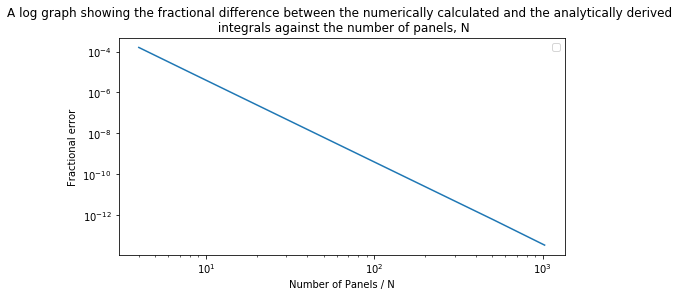

In [19]:
import numpy as np
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

plt.figure (figsize = (8,4))

pt1 = (integrate_numeric(x0, x1, 4))
pt2 = (integrate_numeric(x0, x1, 8))
pt3 = (integrate_numeric(x0, x1, 16))
pt4 = (integrate_numeric(x0, x1, 32))
pt5 = (integrate_numeric(x0, x1, 64))
pt6 = (integrate_numeric(x0, x1, 128))
pt7 = (integrate_numeric(x0, x1, 256))
pt8 = (integrate_numeric(x0, x1, 512))
pt9 = (integrate_numeric(x0, x1, 1024))

result_numeric = numpy.array([pt1,pt2,pt3,pt4,pt5,pt6,pt7,pt8,pt9])
frac_error = (result_analytic-result_numeric)/result_analytic

plt.plot(panel_counts, (frac_error))
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Number of Panels / N")
plt.ylabel("Fractional error")
plt.title("A log graph showing the fractional difference between the numerically calculated and the analytically derived \n integrals against the number of panels, N")
plt.legend()

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

The graph shows a negative linear correlation between fractional error and the number of panels. This means that the larger the number of panels the smaller the difference between the value obtained by the two methods. If the number of panels taken is too large, there are rounding errors as the value becomes too small for the computer to be able to store and process. 
Moreover, it is only possible to use this method if the number of intervals is even.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The trapezium rule approximates the curve with linear functions. This method allows for an odd number of panels to be used therefore, in some cases, it can be considered more accurate. The approximation becomes more accurate as the number of panels increases as the linear sections are able to fit the curve better.